In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Masking, LSTM,Bidirectional, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [75]:

strings = ["h_E", "B", "G", "D", "A", "E"]

data = []
labels = [0,1,2,3,4,5]

with open("b_values.json") as f:
    b_values = json.load(f)
    for string in strings:
        data.append(b_values[string])
        #labels += [string] * len(b_values[string])

with open("avg_amplitude_ratios.json") as f:
    avg_amplitude_ratios = json.load(f)
    for i, string in enumerate(strings):
        avg_ratios = avg_amplitude_ratios[string]
        combined_features = np.column_stack((data[i], avg_ratios))
        data[i] = combined_features

print(len(data))
max_len = max(len(seq) for seq in data)
data_padded = pad_sequences(data, maxlen=max_len, dtype='float32', 
                            padding='post', truncating='post')

data_padded = np.expand_dims(data_padded, -1)
label_count = 6
labels = tf.keras.utils.to_categorical(labels, num_classes=label_count)

X_train, X_test, y_train, y_test = train_test_split(
    data_padded, labels, test_size=0.2, random_state=42, shuffle=True)

print(X_train)
print(X_train.shape)

6
158
[[[[2.9457775e-03]
   [1.2403343e+00]]

  [[3.2565344e-04]
   [1.1118014e+00]]

  [[3.3802300e-04]
   [1.0022819e+00]]

  ...

  [[9.8524419e-05]
   [6.5816581e-01]]

  [[1.8251885e-04]
   [4.4714925e-01]]

  [[6.4162054e-04]
   [3.1973246e-01]]]


 [[[1.4639178e-02]
   [8.3181477e-01]]

  [[5.5692429e-03]
   [6.7202145e-01]]

  [[2.5991874e-04]
   [1.3235620e+00]]

  ...

  [[0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]]]


 [[[3.2025849e-04]
   [1.1696796e+00]]

  [[2.8686305e-03]
   [1.2812926e+00]]

  [[3.2025849e-04]
   [1.1464043e+00]]

  ...

  [[0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]]]


 [[[2.5638600e-03]
   [1.0070429e+00]]

  [[9.0141604e-03]
   [1.0964081e+00]]

  [[3.6282120e-03]
   [9.5278502e-01]]

  ...

  [[0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]]]]

In [70]:

model = Sequential([
    # The Masking layer tells the model which timesteps are padding (i.e., value 0.0)
    Masking(mask_value=0.0, input_shape=(max_len, 2)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(label_count, activation='softmax')
])
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

# Train the model

print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

c:\Program Files\Python310\lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_12 (Masking)            │ (None, 158, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 158, 128)       │        34,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 158, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,414 (224.27 KB)

 Trainable params: 57,414 (224.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 1.7824 - val_accuracy: 0.0000e+00 - val_loss: 1.7678
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3333 - loss: 1.7741 - val_accuracy: 0.0000e+00 - val_loss: 1.7706
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3333 - loss: 1.7639 - val_accuracy: 0.0000e+00 - val_loss: 1.7754
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6667 - loss: 1.7413 - val_accuracy: 0.0000e+00 - val_loss: 1.7811
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.0000e+00 - loss: 1.7587 - val_accuracy: 0.0000e+00 - val_loss: 1.7868
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0000e+00 - loss: 1.7426 - val_accuracy: 0.0000e+00 - val_loss: 1.7936
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3333 - loss: 1.7279 - val_accuracy: 0.0000e+00 - val_loss: 1.8008
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3333 - loss: 1.7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


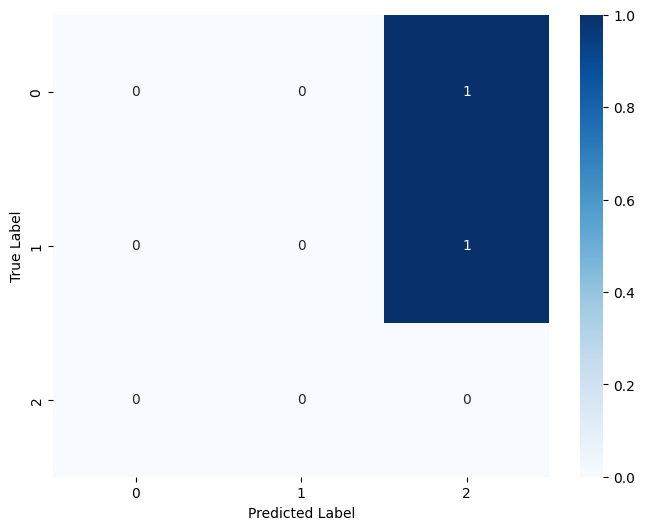

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [74]:
# Generate new data
new_data = np.random.rand(1, max_len, 2).astype('float32')
print(new_data)
new_data_padded = pad_sequences(new_data, maxlen=max_len, dtype='float32', padding='post', truncating='post')
new_data_padded = np.expand_dims(new_data_padded, -1)

# Predict results
new_predictions = model.predict(new_data_padded)
predicted_classes = np.argmax(new_predictions, axis=1)

print("Predicted probabilities:", new_predictions)
print("Predicted class:", predicted_classes)

[[[0.09085684 0.4055784 ]
  [0.22647917 0.913809  ]
  [0.02175201 0.6249577 ]
  [0.7629563  0.20012964]
  [0.5943053  0.19192886]
  [0.58679074 0.9286364 ]
  [0.13167278 0.7193124 ]
  [0.54487777 0.6208993 ]
  [0.78031164 0.9940152 ]
  [0.6212974  0.75448763]
  [0.5000129  0.48009998]
  [0.82032824 0.34390837]
  [0.5935666  0.8841914 ]
  [0.9653407  0.09118678]
  [0.20629774 0.5678838 ]
  [0.4845211  0.33833686]
  [0.02574763 0.15457548]
  [0.41020206 0.95073754]
  [0.5208782  0.2778417 ]
  [0.39796713 0.4572726 ]
  [0.7143408  0.3969131 ]
  [0.4833222  0.04673855]
  [0.95786846 0.9556569 ]
  [0.9873593  0.18739456]
  [0.34370217 0.03666996]
  [0.4446806  0.515449  ]
  [0.80769193 0.09074964]
  [0.4679269  0.24043353]
  [0.45330548 0.8773811 ]
  [0.940462   0.77530473]
  [0.0052172  0.41123903]
  [0.60937685 0.68131256]
  [0.5956686  0.04214637]
  [0.001138   0.9030102 ]
  [0.9972539  0.48590913]
  [0.35109556 0.27339768]
  [0.9355605  0.75928175]
  [0.95966613 0.27588648]
  [0.3301862

In [73]:
model.save('B_value_model.h5')